In [48]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [49]:
mushroom_data = pd.read_csv("/content/mushrooms.csv")
mushroom_data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [50]:
mushroom_data.shape

(8124, 23)

In [51]:
mushroom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [52]:
mushroom_data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [53]:
mushroom_data['class'].value_counts()

class
e    4208
p    3916
Name: count, dtype: int64

In [54]:
#encode
from sklearn.preprocessing import LabelEncoder

In [55]:
encode = LabelEncoder()

def encoder(x):
  mushroom_data[x] = encode.fit_transform(mushroom_data[x])

col = mushroom_data.columns
for i in range(len(col)):
  encoder(col[i])

mushroom_data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


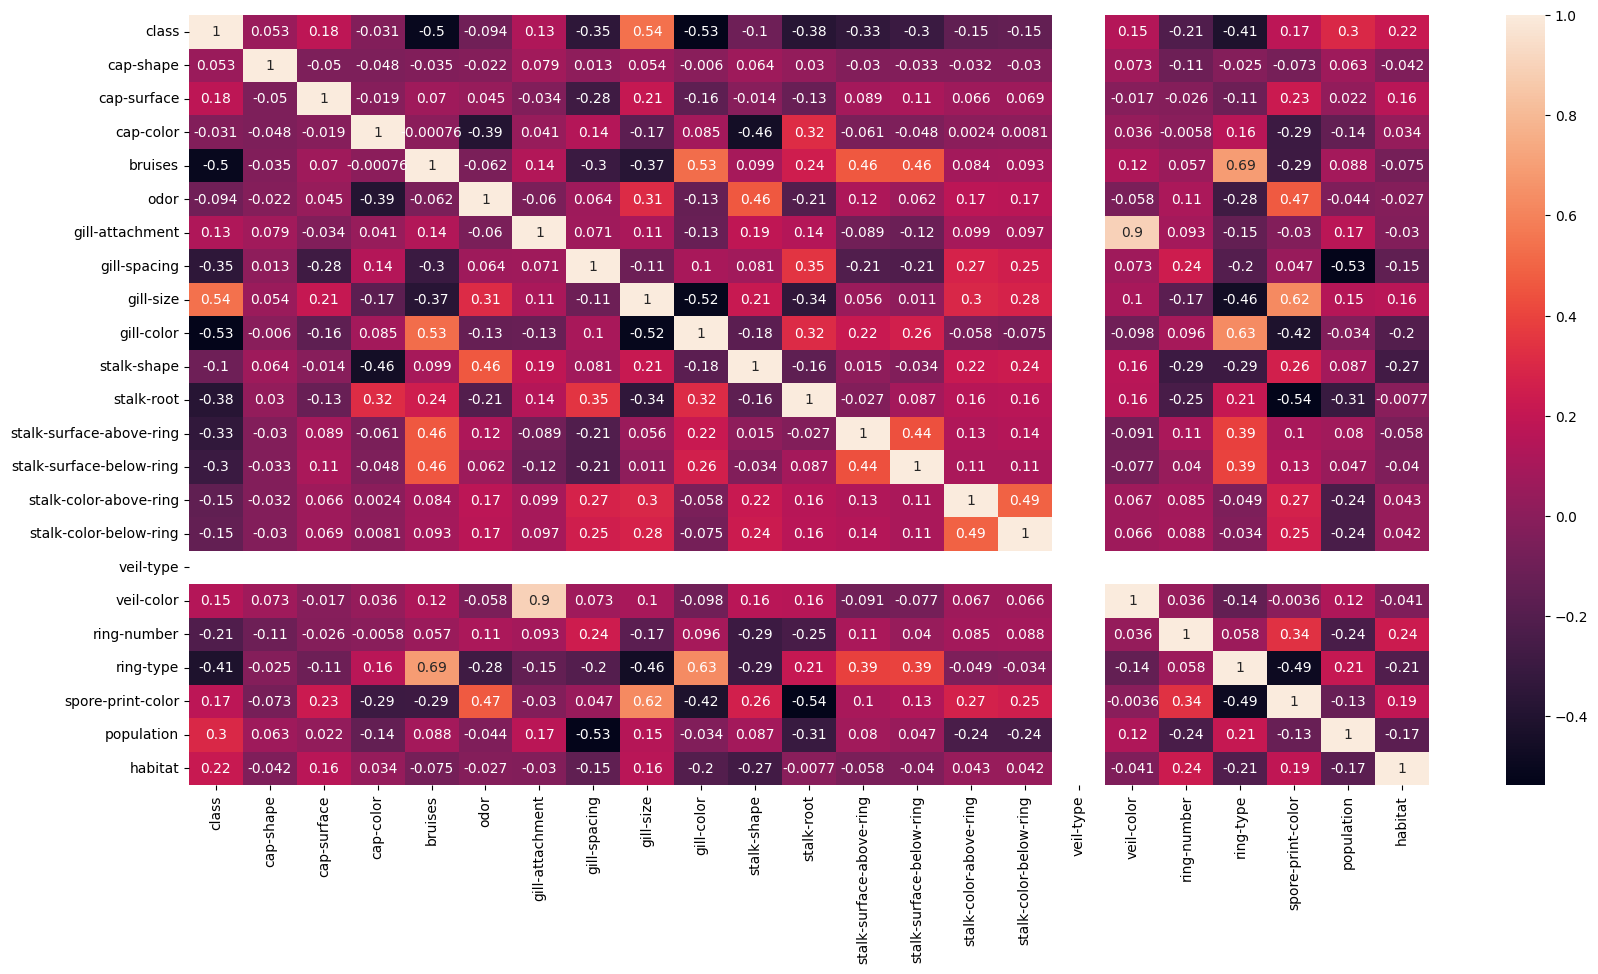

In [56]:
#Visualize

plt.figure(figsize = (20, 10))
sns.heatmap(mushroom_data.corr() , annot= True)
plt.show()

## Splitting the data

In [57]:
#split the data

X = mushroom_data.drop(columns = 'class' , axis = 1)
y = mushroom_data['class']

In [58]:
#train test split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state = 40 , stratify= y )
print(X.shape , X_train.shape , X_test.shape)

(8124, 22) (5686, 22) (2438, 22)


In [59]:
#model building
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [60]:
models = {
    "Logistic Regression" : LogisticRegression(max_iter= 1000),
    "Decision Tree" : DecisionTreeClassifier(),
    "Random Forest" : RandomForestClassifier(),
    "Gradient Boosting" : GradientBoostingClassifier(),
    "SVM" : SVC(kernel = 'linear'),
    'K_NearestNeighbor' : KNeighborsClassifier()

}


In [61]:
def evaluate_model(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)


    metrics = {
        'Train Accuracy': accuracy_score(y_train, y_train_pred),
        'Validation Accuracy': accuracy_score(y_val, y_val_pred),
        'Train Precision': precision_score(y_train, y_train_pred, average='weighted'),
        'Validation Precision': precision_score(y_val, y_val_pred, average='weighted'),
        'Train Recall': recall_score(y_train, y_train_pred, average='weighted'),
        'Validation Recall': recall_score(y_val, y_val_pred, average='weighted'),
        'Train F1': f1_score(y_train, y_train_pred, average='weighted'),
        'Validation F1': f1_score(y_val, y_val_pred, average='weighted'),
    }

    return metrics

In [62]:
results = {}
for model_name, model in models.items():
    results[model_name] = evaluate_model(model, X_train, y_train, X_test, y_test)

results_df = pd.DataFrame(results).T
results_df

,Train Accuracy,Validation Accuracy,Train Precision,Validation Precision,Train Recall,Validation Recall,Train F1,Validation F1
Logistic Regression,0.953394,0.949549,0.953443,0.949595,0.953394,0.949549,0.953382,0.949536
Decision Tree,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Random Forest,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Gradient Boosting,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
SVM,0.977840,0.973749,0.977998,0.973818,0.977840,0.973749,0.977831,0.973742
K_NearestNeighbor,0.999297,0.997539,0.999297,0.997545,0.999297,0.997539,0.999297,0.997539


# Model Selection

### Using gradient boosting classifier




In [63]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators' :[50 , 100 , 200 , 300],
    'learning_rate': [0.01 , 0.05 , 0.1,0.2],
    'max_depth': [3,4,5,6],
    'min_samples_split' : [2,5,10],
    'min_samples_leaf':[1,2,4]
}

gb_model = GradientBoostingClassifier()

random_search = RandomizedSearchCV(estimator = gb_model , param_distributions=param_dist ,
                                   n_iter = 100 , cv = 3 , n_jobs = -1 , verbose = 2 , random_state = 42)

random_search.fit(X_train , y_train)

best_params = random_search.best_params_
print("Best parameters :", best_params)


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters : {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 5, 'learning_rate': 0.05}


In [64]:
random_search.best_estimator_

GradientBoostingClassifier(learning_rate=0.05, max_depth=5, min_samples_leaf=2,
                           min_samples_split=5, n_estimators=200)

In [65]:
from sklearn.metrics import classification_report

final_model = random_search.best_estimator_

final_model.fit(X_train , y_train)

y_test_pred = final_model.predict(X_test)

print(classification_report(y_test_pred , y_test))



              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1263
           1       1.00      1.00      1.00      1175

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [66]:
import pickle

In [45]:
filename = 'mush_model.sav'
pickle.dump(final_model, open(filename , 'wb'))

In [67]:
#loading the saved model

loaded_model = pickle.load(open('mush_model.sav', 'rb'))

In [73]:
#prediction

input_data = (5,2,8,1,2,1,0,0,3,1,1,0,0,7,7,0,2,1,4,1,3,5)

input_as_array = np.array(input_data)
input_reshape = input_as_array.reshape(1,-1)

prediction = loaded_model.predict(input_reshape)

print(prediction)

[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [72]:
y_test.head()

459     0
4410    0
3076    0
4661    1
3880    0
Name: class, dtype: int64